# MSc in AI - CE6002 & CS5062


# E-tivity 3: Clustering and Manifold Learning
# Tasks 1 and 2

## Student Name: Mark Murnane
## Student ID: 18195326




Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

from sklearn.metrics import silhouette_score

### Data Load

The data for Tasks 1 and 2 will be taken from the *loans_dataset_et3.csv* file.

In [2]:
df = pd.read_csv('loans_dataset_et3.csv', header=0)
print(f"Shape of the source data is {df.shape[0]} rows, each with {df.shape[1]} columns\n")
df.describe()

Shape of the source data is 332 rows, each with 5 columns



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


As *scikit-learn* APIs use Numpy arrays for data, take a copy of the data in that format now for later use.

In [3]:
loans_data = np.array(df.values)

## Task 1

### K-means clustering of the _loans_ dataset

Follow the examples in the notebook *Lab 3 - Clustering and Manifold Learning.ipynb* to cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering.

Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset


In [4]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

As K Means requires an input parameter of the cluster, we'll use an initial value of 3, subject to later review based on analysis of the generated clusters.

In [5]:
k = 3

As noted in in the Scikit-Learn docs, K-Means works on the assumption that clusters are _convex_ and _isotropic_.  This makes it sensitive to variances in the input data.  If the data is elongated it performs poorly.  

As an alternative to MinMaxScaler(), use StandardScalar() instead.

In [6]:
min_max_scaler = preprocessing.StandardScaler()
loans_data = min_max_scaler.fit_transform(loans_data)

Run the clustering and plot the results.

In [7]:
kmeans_data = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(loans_data)

In [8]:
kmeans_data_and_centers = np.r_[loans_data, kmeans_data.cluster_centers_]

As the data is in a high-dimensional space, we use Manifold methods (MDS and t-SNE) to project into a 2-D space for visualisation.

In [9]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(kmeans_data_and_centers)

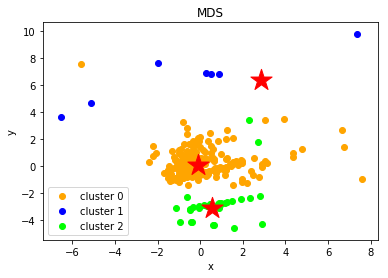

In [10]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=kmeans_data.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')


In [11]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(kmeans_data_and_centers)

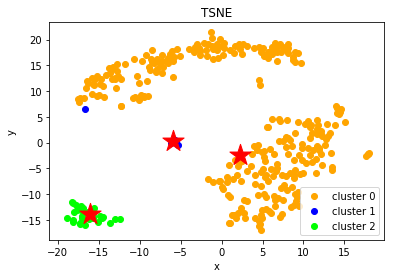

In [12]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=kmeans_data.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### Parameter adjustments

Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. 

### Conclusion

The different show potentially different aspects of the data.  With an initial value of K=3 the MDS plot suggests that there might be 3 clusters.  As MDS uses distance as it's measure some of the plots seem incorrect.

The t-SNE plot shows an alternative view of the data.  It's purpose is to suggest similarity in the data.  The small size of cluster 1 suggests that this may not be viable cluster.  The distribution of cluster 0, however is difficult tomorrow as it suggests a difference.

Improved scaling of the input feature set might be an appropriate step.

## Task 2

### Identifying the correct value of k using the Elbow method

The sum of the squared distances can be visualised using the Elbow method.

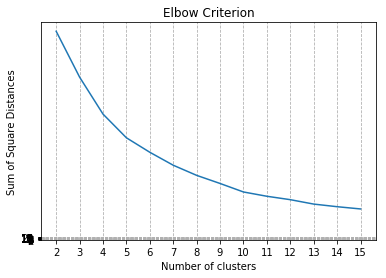

In [15]:
min_k = 2
max_k = 16

sum_squared_distances = np.empty(max_k - min_k)

for k in range (min_k, max_k):

    k_value_means = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(loans_data)

    # What value should the SSE be set to?
    sum_squared_distances[k-min_k] = k_value_means.inertia_
    
    #print(f"SSD at k value {k} = {sum_squared_distances[k-min_k]:.4f}")

    
plt.title("Elbow Criterion")
    
# Plot the elbow-criterion as mentioned above. 
plt.plot(range(min_k,max_k), sum_squared_distances)
plt.ylabel("Sum of Square Distances")
plt.xlabel("Number of clusters")
plt.xticks(range(min_k, max_k))
plt.yticks(range(2, 21, 1))
plt.grid(True, linestyle='--')

plt.show()

The graph is relatively shallow and has no distinctive elbow in it.  Possibly the closest is a value of 10 clusters.  Initiall I plotted k=10, however this seemed too many, so k=8 was chosen.  We can visualise this below.

In [22]:
k=8
higher_k = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(loans_data)
kmeans_data_and_centers = np.r_[loans_data, higher_k.cluster_centers_]

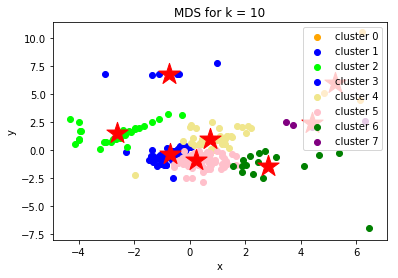

In [23]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(kmeans_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=higher_k.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS for k = 8')

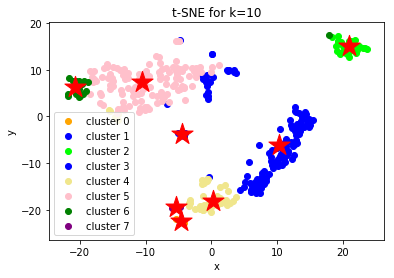

In [24]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(kmeans_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=higher_k.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE for k=8')

### Identifying the correct value of k using the Silhouette method

The Silhouette co-efficient for k = 2 is: 0.72871
The Silhouette co-efficient for k = 3 is: 0.40345
The Silhouette co-efficient for k = 4 is: 0.46671
The Silhouette co-efficient for k = 5 is: 0.44959
The Silhouette co-efficient for k = 6 is: 0.45533
The Silhouette co-efficient for k = 7 is: 0.36362
The Silhouette co-efficient for k = 8 is: 0.36259
The Silhouette co-efficient for k = 9 is: 0.36445
The Silhouette co-efficient for k = 10 is: 0.36922
The Silhouette co-efficient for k = 11 is: 0.39309
The Silhouette co-efficient for k = 12 is: 0.39374
The Silhouette co-efficient for k = 13 is: 0.37889
The Silhouette co-efficient for k = 14 is: 0.37564
The Silhouette co-efficient for k = 15 is: 0.33808


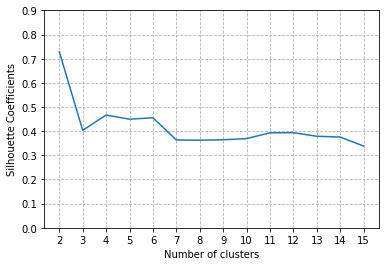

In [25]:
s_coeff = np.array([])

for k in range(min_k, max_k):
    k_value_means = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(loans_data)
    label=k_value_means.labels_
    s_coeff = np.append(s_coeff, silhouette_score(loans_data, label))
    
    print(f"The Silhouette co-efficient for k = {k} is: {s_coeff[k-min_k]:.5f}")
    
plt.plot(range(min_k,max_k), s_coeff)
plt.ylabel("Silhouette Coefficients")
plt.xlabel("Number of clusters")
plt.xticks(range(min_k, max_k))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid(True, linestyle='--')

plt.show()

The silhouette method suggests that a lower value of k may be appropriate.

In [40]:
k=2
lower_k = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(loans_data)
kmeans_data_and_centers = np.r_[loans_data, lower_k.cluster_centers_]

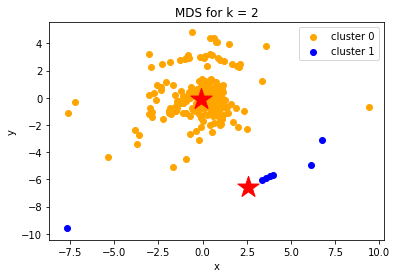

In [41]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(kmeans_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=lower_k.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS for k = 2')

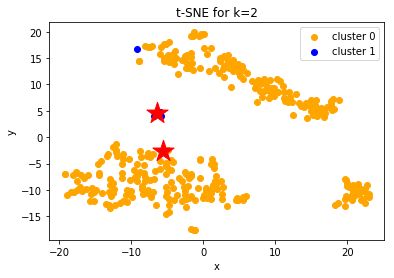

In [42]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(kmeans_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=lower_k.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE for k=2')

## Other algorithm

For the additional algorithm, I'll use Spectral Clustering.  It uses a a graph distance metric as opposed to the distance measure of K-Means.  It has the same core parameter which would be the number of clusters.  This makes it a interesting comparison as the input remains the same.

Using the same initial value of k=3 as earlier we can do a quick comparison.

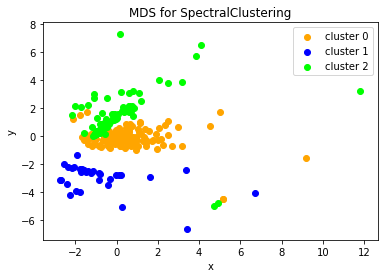

In [52]:
clusters=3

spectral = cluster.SpectralClustering(n_clusters = clusters, affinity='nearest_neighbors', assign_labels='discretize', random_state=42).fit(loans_data)

XYcoordinates = manifold.MDS(n_components=2).fit_transform(loans_data)
clustering_scatterplot(points=XYcoordinates, 
                       labels=spectral.labels_,                
                       centers = None,
                       title='MDS for SpectralClustering')

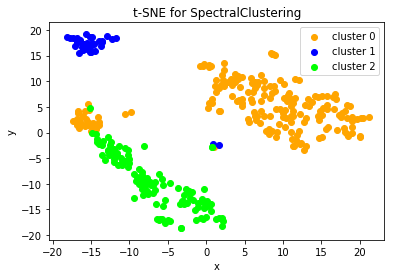

In [53]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(loans_data)
clustering_scatterplot(points=XYcoordinates, 
                       labels=spectral.labels_,                
                       centers = None,
                       title='t-SNE for SpectralClustering')

Compared to the original K-Means plots for k=3, the Spectral Clustering plots show what appear to be more clearly defined clusters.